# Stats/ML Study Sesh

## Python version

## TOC <a class="anchor" id="top"></a>

- [Numerical Measures](#numerical-measures)
- [Probability Distributions](#probability-distributions)


## Numerical measures

From [R numerical measures](http://www.r-tutor.com/elementary-statistics/numerical-measures).

- [Mean and median](#mean-and-median)
- [Quartile/Percentile](#quartile-percentile)
- [Range](#range)
- [Interquartile range](#interquartile-range)
- [Variance](#variance)
- [Standard deviation](#standard-deviation)
- [Covariance](#covariance)
- [Correlation coefficient](#correlation-coefficient)

## Probability distributions

From [R probability distributions](http://www.r-tutor.com/elementary-statistics/probability-distributions)

- [Binomial distribution](#binomial-dist)
- [Poisson distribution](#poisson-dist)
- [Continuous uniform distribution](#continuous-uniform-dist)
- [Exponential distribution](#exponential-dist)
- [Normal distribution](#normal-dist)
- [Chi-squared distribution](#chi-squared-dist)

# Numerical measures <a class="anchor" id="numerical-measures"></a>

[back to top](#top)

### Our list in Python

In [1]:
import numpy as np

my_list = [3, 6, 12, 17, 32, 49, 50, 90]

print('My list of numbers: ', my_list)

My list of numbers:  [3, 6, 12, 17, 32, 49, 50, 90]


We can take a look at what variables are available in the Jupyter environment. This includes all `code` cells. Variables cannot be used in markdown cells unfortunately.

In [2]:
whos

Variable   Type      Data/Info
------------------------------
my_list    list      n=8
np         module    <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>


### Mean and median <a class="anchor" id="mean-and-median"></a>

[back to top](#top)

In [3]:
# The Pythonic way is to do only one thing per line
# This:
#
# a = np.some_calculation(arg)
# print("hello: ", a)
#
# is more readable than this:
#
# print("hello: ", np.some_calculation(arg))
#

print(my_list)

m = np.mean(my_list)
d = np.median(my_list)

print(f'Mean: {m}')
print('Median: ', d)

[3, 6, 12, 17, 32, 49, 50, 90]
Mean: 32.375
Median:  24.5


### Quartiles and percentiles <a class="anchor" id="quartile-percentile"></a>

[back to top](#top)

In [4]:
# If you need to calculate the same thing manytimes, use a loop:

print(my_list)

p_tiles = [25, 50, 75, 3, 9, 90, 99]

for i in p_tiles:
    p = np.percentile(my_list, i)
    print(f'{i}th percentile: {p}')

[3, 6, 12, 17, 32, 49, 50, 90]
25th percentile: 10.5
50th percentile: 24.5
75th percentile: 49.25
3th percentile: 3.63
9th percentile: 4.890000000000001
90th percentile: 61.99999999999999
99th percentile: 87.19999999999999


### Range <a class="anchor" id="range"></a>

[back to top](#top)

In [5]:
# In Python the keyword 'range' is already taken
# so instead, numpy names it 'peak to peak'

print(my_list)

r = np.ptp(my_list)
print('Range: ', r)

[3, 6, 12, 17, 32, 49, 50, 90]
Range:  87


### Interquartile Range <a class="anchor" id="interquartile-range"></a>

[back to top](#top)

In [6]:
print(my_list)

# Numpy doesn't have a dedicated function for IQR
q25, q75 = np.percentile(my_list, [25, 75])
iqr = q75 - q25

print('IQR: ', iqr)

[3, 6, 12, 17, 32, 49, 50, 90]
IQR:  38.75


### Variance <a class="anchor" id="variance"></a>

[back to top](#top)

The **variance** is a numerical measure of how the data values are dispersed around the mean. The sample mean and variance are $\bar{x}$ and $s^2$, respectively. The population mean and variance are $\mu$ and $\sigma^2$.

To calculate the variance, you take each value and subtract the mean from it, then square the result. Once you have added all the squares divide that total by the number of observations. Actually, just one less than the total number of observations. It looks like this. Where $n$ is the total number of observations.

$$s^2 = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 +\;...\,+ (x_n - \bar{x})^2}{n-1}$$

The fancy mathematical way to write it is like this.

$$s^2=\frac{1}{n-1}\sum_{i=1}^n (x_{i}-\bar{x})^2 \qquad \text{or} \qquad \sigma^2=\frac{1}{n-1}\sum_{i=1}^n (x_{i}-\mu)^2$$

In [7]:
print(my_list)

# Numpy defaults to 0 degrees of freedom
variance = np.var(my_list, ddof=1)

print(f'Variance: {variance}')

[3, 6, 12, 17, 32, 49, 50, 90]
Variance: 873.9821428571429


### Standard deviation <a class="anchor" id="standard-deviation"></a>

[back to top](#top)

The **standard deviation** of an observation variable is the square root of its variance.

Sample $\sqrt{s^2}$.

Population $\sqrt{\sigma^2}$.

In [8]:
print(my_list)

std = np.std(my_list, ddof=1)

print(f'Std dev: {std}')

[3, 6, 12, 17, 32, 49, 50, 90]
Std dev: 29.5631889832126


### Covariance <a class="anchor" id="covariance"></a>

[back to top](#top)

The **covariance** ($s_{xy}$ or $\sigma_{xy}$) of two variables *x* and *y* in a data set measures how the two are linearly related. A positive covariance would indicate a positive linear relationship between the variables, and a negative covariance would indicate the opposite.

To calculate the covariance you take the error in each observation of both sets and multiply with its corresponding error in the other variable. Then you add all the products. Then you divide by one less than the total number of observations.

$$s_{xy} = \frac{(x_1 - \bar{x})(y_1 - \bar{y}) + (x_2 - \bar{x})(y_2 - \bar{y})\;+\;...\,+\;(x_n - \bar{x})(y_n - \bar{y})}{n-1}$$

In fancy math notation this looks like so

$$s_{xy}= \frac{1}{n-1}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y}) \qquad or \qquad \sigma_{xy}= \frac{1}{n-1}\sum_{i=1}^n(x_i - \mu_x)(y_i - \mu_y)$$

The `cov` function provided in numpy outputs a covariance matrix. In this case the covariance appears in the top right and bottom left.

In [9]:
my_second_list = [20, 31, 33, 34, 35, 37, 41, 49]

print(my_list)
print(my_second_list)

covar = np.cov(my_list, my_second_list, ddof=1)

print(f'Covariance:\n{covar}')

[3, 6, 12, 17, 32, 49, 50, 90]
[20, 31, 33, 34, 35, 37, 41, 49]
Covariance:
[[ 873.98214286  221.14285714]
 [ 221.14285714   68.85714286]]


### Correlation coefficient <a class="anchor" id="correlation-coefficient"></a>

[back to top](#top)

The **correlation coefficient** of two variables in a data set is equal to their covariance divided by the product of their individual standard deviations. It is a normalized measurement of how the two are linearly related.

$$r_{xy} = \frac{s_{xy}}{s_xs_y} \qquad or \qquad \rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

That's a lowercase rho by the way. In the below example, numpy returns a matrix. The reason is that the function is designed to return correlation of multiple data sets. The case of just two is a special case and does not justify changing the ouput type from matrix to integer.

In [10]:
print(my_list, '\n')
print(my_second_list, '\n')

r = np.corrcoef(my_list, my_second_list)

print(f'Correlation coeficient:\n{r}')

[3, 6, 12, 17, 32, 49, 50, 90] 

[20, 31, 33, 34, 35, 37, 41, 49] 

Correlation coeficient:
[[ 1.         0.9014614]
 [ 0.9014614  1.       ]]


# Probability distributions <a class="anchor" id="probability-distributions"></a>

[back to top](#top)

Numpy has functions to generate random data with [these](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) probability distributions.

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

### Binomial distribution <a class="anchor" id="binomial-dist"></a>

[back to top](#top)

The **binomial distribution** describes the outcome of *n* independent trials in an experiment. Each trial is assumed to have only two outcomes, either success or failure.

$$f(x) =
    \begin{pmatrix}
    n \\
    x \\
    \end{pmatrix}
    p^x (1-p)^{n-x} \qquad \text{where}\; x = 0, 1, 2, ... , n
$$

In actual English, this is the distribution you get when you flip a coin. Or when you take a multiple choice test. If there are five choices, success at random will have

$P(\text{correct}) = .2$

Therefore

$P(\text{wrong}) = 1-.2 = .8$.

[-1, 11, 0, 110]

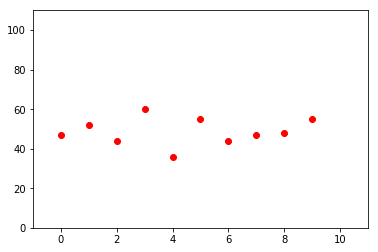

In [12]:
# Flip a fair coin a hundred times and count how many heads
# Do that ten times

n = 100  # One hundred flips
p = .5  # Fair coin

coins = np.random.binomial(n, p, 10)  # Ten times

coins
x = np.arange(0,10,1)  # for the x axis

plt.plot(x, coins, 'ro')
plt.axis([-1, 11, 0, 110])

[-1, 21, 0, 50]

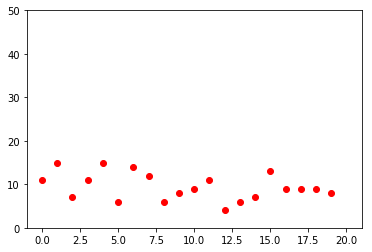

In [13]:
# Have a monkey take a multiple choice test with fifty questions.
# There are five choices per question.
# Get the results of twenty monkeys.

n = 50
p = .2

monkeys = np.random.binomial(n, p, 20)

monkeys
x = np.arange(0,20,1)  # for the x axis

plt.plot(x, monkeys, 'ro')
plt.axis([-1,21,0,50])

### Poisson distribution <a class="anchor" id="poisson-dist"></a>

[back to top](#top)

The **poisson distribution** is the probability distribution of independent event occurrences in an interval. If you have an avearge number of occurences in an interval, then the probability of having $x$ occurrences within a given interval is:

$$
f(x) = 
\frac{\lambda^x e^{-\lambda}}{x!} \qquad \text{where}\; x = 0, 1, 2, 3, ...
$$

In actual English, if an average of 10 cars cross a bridge every minute, the Poisson distribution describes the distribution of said car crossings.

(array([  17.,   38.,   72.,   96.,   87.,  126.,   26.,   26.,    5.,    7.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

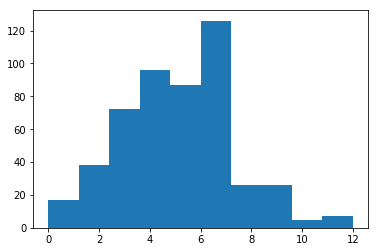

In [14]:
# A certain university sees an average of five streakers per home football game.
# If there are 500 games in a decade, what does a typical decade of streakers look like?

s = 5  # Average number of streakers

l = np.random.poisson(s, 500)

plt.hist(l)

In [15]:
import math

def my_poisson(x, l):
    numerator = (l^x) * (math.e^-l)
    denominator = math.factorial(x)
    return numerator/denominator



To plot the theoretical line see maybe [here](http://www.astroml.org/book_figures/chapter3/fig_poisson_distribution.html)?

### Continuous uniform distribution <a class="anchor" id="continuous-uniform-dist"></a>

[back to top](#top)


### Exponential distribution <a class="anchor" id="exponential-dist"></a>

[back to top](#top)


### Normal distribution <a class="anchor" id="normal-dist"></a>

[back to top](#top)


### Chi-squared distribution <a class="anchor" id="chi-squared-dist"></a>

[back to top](#top)
